In [6]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('hepatitis.csv')
df.head()


,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [8]:
df.shape

(154, 20)

### Data cleaning

In [9]:
df.isnull().sum()

2       0
30      0
2.1     0
1       0
2.2     0
2.3     0
2.4     0
2.5     0
1.1     0
2.6     0
2.7     0
2.8     0
2.9     0
2.10    0
1.00    0
85      0
18      0
4.0     0
?       0
1.2     0
dtype: int64

In [10]:
df = df.replace(['?'], [np.nan])

In [11]:
df.isna().sum()

2        0
30       0
2.1      0
1        1
2.2      0
2.3      1
2.4      1
2.5      1
1.1     10
2.6     11
2.7      5
2.8      5
2.9      5
2.10     5
1.00     6
85      29
18       4
4.0     16
?       66
1.2      0
dtype: int64

In [12]:
df1 = pd.read_csv('hepatitis1.csv')

In [13]:
df1.shape


(142, 20)

### Data transformation

In [14]:
df1['histology'] = df1['histology'].replace([1], [0])
df1['histology'] = df1['histology'].replace([2], [1])
df1['histology']

0      0
1      0
2      0
3      0
4      0
      ..
137    1
138    1
139    1
140    1
141    1
Name: histology, Length: 142, dtype: int64

### Outlier remaval

In [15]:
import seaborn as sns

C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

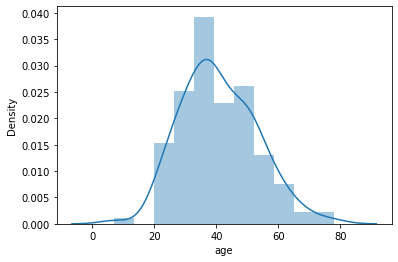

In [16]:
sns.distplot(df1['age'])

In [17]:
print("Highest allowed",df1['age'].mean() + 3*df1['age'].std())
print("Lowest allowed",df1['age'].mean() - 3*df1['age'].std())

Highest allowed 77.38444844068204
Lowest allowed 4.2493543762193795


In [18]:
temp = df1[(df1['age'] > 77.38) | (df1['age'] < 4.24)]

In [19]:
temp

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,0


C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alk_phosphate', ylabel='Density'>

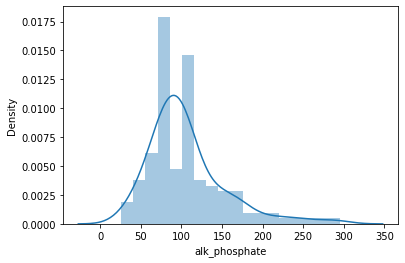

In [20]:
sns.distplot(df1['alk_phosphate'])

In [21]:
print('Highest', df1['alk_phosphate'].mean()+3*df1['alk_phosphate'].std())
print('lowest', df1['alk_phosphate'].mean()-3*df1['alk_phosphate'].std())

Highest 247.77318289231027
lowest -36.47740824442293


In [22]:
temp = df1[(df1['alk_phosphate']>247) | (df1['alk_phosphate']<-36)]
temp

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
29,1,39,1,1,1,1,1,2,2,1,2,2,2,2,2.3,280,98,3.8,40,0
102,2,7,1,2,2,2,2,2,2,1,1,2,2,2,0.7,256,25,4.2,61,1
130,2,36,1,1,2,1,1,1,1,1,2,1,2,1,1.7,295,60,2.7,61,1


In [23]:
temp = df1[(df1['alk_phosphate']<247) & (df1['alk_phosphate']>-36)]
temp.shape

(139, 20)

In [24]:
x = df1[['age','sex']]
y = df1['class']
y

0      2
1      2
2      2
3      2
4      2
      ..
137    1
138    2
139    2
140    2
141    1
Name: class, Length: 142, dtype: int64

### Model building(Naive bayes)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size=0.2)

In [48]:
x_tr

,age,sex
90,44,1
141,43,1
67,34,1
47,39,1
16,40,1
...,...,...
19,22,2
100,54,1
41,34,1
103,42,1


In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x_tr = sc.fit_transform(x_tr)

In [50]:
x_tr

,age,sex
90,44,1
141,43,1
67,34,1
47,39,1
16,40,1
...,...,...
19,22,2
100,54,1
41,34,1
103,42,1


In [51]:
#x_te = sc.transform(x_te)

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_tr, y_tr)

GaussianNB()

In [53]:
ypred = classifier.predict(x_te)

In [54]:
ypred

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_te, ypred)

In [56]:
cm

array([[ 7,  0],
       [17,  5]], dtype=int64)

In [57]:
acc = accuracy_score(y_te, ypred)

In [58]:
acc

0.41379310344827586

### Subsets

In [59]:
sub1 = df1[df1['sex']==1]
sub1.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.50,61,0
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.00,61,0
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.00,61,0
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.00,75,0
5,1,51,1,1,2,1,2,1,2,2,1,1,2,2,1.42,105,85,3.81,61,0


In [60]:
sub2 = df1[df1['sex']==2]
sub2.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,0
19,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.9,48,20,4.2,64,0
23,2,25,2,1,1,2,2,2,2,2,2,2,2,2,0.4,45,18,4.3,70,0
26,2,58,2,2,2,1,2,2,2,1,2,1,2,2,1.4,175,55,2.7,36,0
30,2,41,2,2,1,1,1,1,2,2,2,2,2,2,0.7,81,53,5.0,74,0


### Merge Subsets

In [62]:
sub3 = pd.merge(sub1, sub2, how='outer')

In [63]:
sub3.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.50,61,0
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.00,61,0
2,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.00,61,0
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.00,75,0
4,1,51,1,1,2,1,2,1,2,2,1,1,2,2,1.42,105,85,3.81,61,0


In [64]:
sub3.sort_values('age')

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
90,2,7,1,2,2,2,2,2,2,1,1,2,2,2,0.7,256,25,4.20,61,1
133,2,20,2,1,2,1,1,1,1,1,1,1,2,2,2.3,150,68,3.90,61,0
99,2,20,1,1,2,1,1,1,2,2,2,1,1,2,1.0,160,118,2.90,23,1
121,2,20,1,1,2,2,2,2,2,2,2,2,2,2,0.9,89,152,4.00,61,1
128,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.9,48,20,4.20,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2,65,1,2,2,1,1,2,2,1,1,1,1,2,0.3,180,53,2.90,74,1
14,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.30,61,0
139,2,69,2,2,2,1,2,2,2,2,2,2,2,2,3.2,119,136,3.81,61,1
109,2,72,1,2,1,1,2,2,2,1,2,2,2,2,1.0,115,52,3.40,50,1


### Transpose

In [66]:
sub2.transpose()

,0,19,23,26,30,31,35,44,55,72,78,84,107,116,140
class,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.00,2.0,2.0
age,30.0,22.0,25.0,58.0,41.0,26.0,20.0,28.0,45.00,34.0,62.0,50.0,69.00,34.0,53.0
sex,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.00,2.0,2.0
steroid,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.00,1.0,2.0,1.0,2.00,2.0,1.0
antivirals,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.00,1.0,2.0,2.0,2.00,2.0,2.0
fatigue,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.00,2.0,1.0,1.0,1.00,1.0,1.0
malaise,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.00,2.0,1.0,2.0,2.00,1.0,2.0
anorexia,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.00,2.0,2.0,2.0,2.00,1.0,2.0
liver_big,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.00,2.0,2.0,1.0,2.00,1.0,2.0
liver_firm,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.00,1.0,1.0,1.0,2.00,1.0,2.0


In [45]:
sub4 = pd.melt(sub3, id_vars=['age'], value_vars=['class', 'sex'])

In [55]:
sub4

,age,variable,value
0,50,class,2
1,78,class,2
2,34,class,2
3,34,class,2
4,51,class,1
...,...,...,...
279,62,sex,2
280,50,sex,2
281,69,sex,2
282,34,sex,2


In [58]:
sub3.pivot_table(index='age', columns='sex', values='alk_phosphate',aggfunc='mean', fill_value=0)

age,7,20,22,23,24,25,26,27,28,30,...,59,60,61,62,64,65,66,69,72,78
sex,,,,,,,,,,,,,,,,,,,,,
1,256,124.5,105,134.666667,93.5,143,0,125.25,67.666667,96.571429,...,107,105,76.5,0,80,180,102,0,115,96
2,0,150.0,48,0.000000,0.0,45,135,0.00,191.000000,85.000000,...,0,0,0.0,141,0,0,0,119,0,0
